## Forced system

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
#import scipy
import matplotlib.pyplot as plt
#from scipy.integrate import solve_ivp
from polimi import solve_ivp
import polimi.systems as systems
import polimi.envelope as envelope
from polimi.solvers import *
print('numpy version: ' + np.__version__)
#print('scipy version: ' + scipy.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
numpy version: 1.16.1


In [5]:
epsilon = 0.001
A = [10,0]
T = [10.,100.]
tend = 30.
y0_ref = np.array([2,-3])
reltol = 1e-6
abstol = 1e-8*np.ones(y0_ref.shape)
ref = solve_ivp(lambda t,y: systems.vdp(t,y,epsilon,A,T),[0,tend], y0_ref,
                method='BDF', jac=lambda t,y: systems.vdp_jac(t,y,epsilon),
                events=systems.y1min, atol=abstol, rtol=reltol)

First step = 5.87174e-05


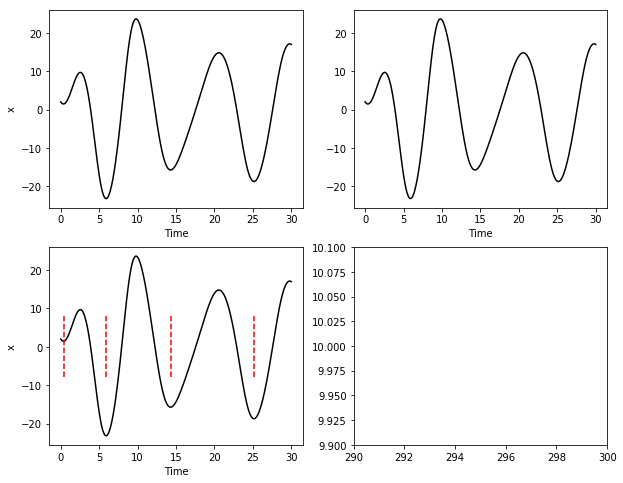

(16.957278,-1.467428)


In [4]:
plt.figure(figsize=[10,8])
plt.subplot(2,2,1)
plt.plot(ref['t'],ref['y'][0],'k')
plt.xlabel('Time')
plt.ylabel('x')
plt.subplot(2,2,2)
idx = ref['t'] > tend-5*np.max(T)
plt.plot(ref['t'][idx],ref['y'][0,idx],'k')
plt.xlabel('Time')
plt.subplot(2,2,3)
idx = ref['t'] > tend-np.max(T)
jdx, = np.where(ref['t_events'][0] > tend-np.max(T))
plt.plot(ref['t'][idx],ref['y'][0,idx],'k')
for j in jdx:
    plt.plot(ref['t_events'][0][j]+np.zeros(2),[-8,8],'r--')
plt.ylabel('x')
plt.xlabel('Time')
plt.subplot(2,2,4)
plt.plot(np.diff(ref['t_events'][0]),'k')
plt.axis([290,300,9.9,10.1])
plt.show()
print('(%f,%f)' % tuple(ref['y'][:,-1]))

In [7]:
y0 = ref['y'][:,-1]
tend = 1000
ref = solve_ivp(lambda t,y: systems.vdp(t,y,epsilon,A,T),[0,tend], y0,
                method='BDF', jac=lambda t,y: systems.vdp_jac(t,y,epsilon),
                events=systems.y1min, atol=abstol, rtol=reltol)

First step = 2.14333e-05


In [9]:
T_min = np.min(T)
print('T_min =', T_min)
fun = lambda t,y: systems.vdp(t,y,epsilon,A,T)
env_fun = lambda t,y: envelope._envelope_system(t,y,fun,T_min)
sol = solve_ivp(env_fun, [0,tend], y0, method='BDF', period=T_min)

T_min = 10.0


TypeError: super(type, obj): obj must be an instance or subtype of type

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(ref['t'],ref['y'][0],'k')
plt.plot(sol['t'],sol['y'][0],'ro-')
#plt.axis([0,20,0,25])
plt.show()

In [ ]:
y0 = ref['y'][:,-1]
tend = 300
ref = solve_ivp(lambda t,y: systems.vdp(t,y,epsilon,A,T),[0,tend], y0,
                method='BDF', jac=lambda t,y: systems.vdp_jac(t,y,epsilon),
                events=systems.y1min, atol=abstol, rtol=reltol)
T_min = np.min(T)
H = 2*T_min
fun = lambda t,y: systems.vdp(t,y,epsilon,A,T)
env_fun = lambda t,y: envelope._envelope_system(t,y,fun,T_min)
fw_eul = forward_euler(env_fun, [0,tend], y0, H)
bdf_var_step = solve_ivp(env_fun, [0,tend], y0, method='BDF')
sol = envelope.envelope_full(lambda t,y: systems.vdp(t,y,epsilon,A,T),[0,tend],y0,T_min,H,4)

In [ ]:
bdf_var_step['y'][0]

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(ref['t'],ref['y'][0],color=[.6,.6,.6])
plt.plot(sol['t'],sol['y'][0],'k')
plt.plot(sol['T'],sol['Z'][0],'r')
plt.plot(bdf_var_step['t'],bdf_var_step['y'][0],'go-')
#plt.plot(fw_eul['t'],fw_eul['y'][0],'k')
t = 0
col = 'g'
# while t < tend:
#     if col == 'r':
#         col = 'g'
#     else:
#         col = 'r'
#     plt.plot([t,t],[-25,25],col)
#     t += T_min
#plt.axis([150,200,0,30])
plt.show()

In [ ]:
fun = lambda t,y: systems.vdp(t,y,epsilon,[0],[1])
env_fun = lambda t,y: envelope._envelope_system(t,y,fun,T_norm)
fw_eul = forward_euler(env_fun, [0,tend], y0, 100*T_norm)
fw_eul['t'] *= np.sqrt(L*C)
fw_eul['y'] *= np.sqrt(alpha/(3*gamma))
bdf_fixed_step = bdf(env_fun, [0,tend], y0, 100*T_norm, order=4)
bdf_fixed_step['t'] *= np.sqrt(L*C)
bdf_fixed_step['y'] *= np.sqrt(alpha/(3*gamma))

In [ ]:
bdf_var_step = solve_ivp(env_fun, [0,tend], y0, method='BDF')
solutions = []
for i in range(len(bdf_var_step['t'])):
    env_t0 = bdf_var_step['t'][i]
    env_y0 = bdf_var_step['y'][:,i]
    #print('%03d/%03d' % (i,len(bdf_var_step['t'])))
    solutions.append(solve_ivp(fun, [env_t0,env_t0+T_norm], env_y0, method='BDF'))
    solutions[-1]['t'] *= np.sqrt(L*C)
    solutions[-1]['y'] *= np.sqrt(alpha/(3*gamma))
bdf_var_step['t'] *= np.sqrt(L*C)
bdf_var_step['y'] *= np.sqrt(alpha/(3*gamma))

In [ ]:
orange = [1,.8,.4]
cyan = [0,.7,1]
green = [0,1,.3]
plt.figure(figsize=(10,18))
plt.subplot(3,1,1)
plt.plot(t_ref,v_ref,color=orange,label='Full solution')
plt.plot(sol['t'],sol['y'][0],'k',lw=1,label='y')
plt.plot(sol['T'],sol['Z'][0],'mo-',lw=2,label='Envelope')
plt.plot(fw_eul['t'],fw_eul['y'][0],'s-',color=cyan,lw=2,label='Forward Euler')
plt.plot(bdf_fixed_step['t'],bdf_fixed_step['y'][0],'s-',color=green,lw=2,label='BDF fixed step')
plt.plot(bdf_var_step['t'],bdf_var_step['y'][0],'^-',color=[1,0,0],lw=2,label='BDF variable step')
plt.ylabel('Voltage (V)')
plt.legend(loc='best')
plt.subplot(3,1,2)
plt.plot(t_ref,v_ref,color=orange)
plt.plot(sol['T'],sol['Z'][0],'mo-',lw=6,markersize=12)
plt.plot(fw_eul['t'],fw_eul['y'][0],'s-',color=cyan,lw=4,label='Forward Euler')
plt.plot(bdf_fixed_step['t'],bdf_fixed_step['y'][0],'s-',color=green,lw=4,label='BDF fixed step')
plt.plot(bdf_var_step['t'],bdf_var_step['y'][0],'^-',color=[1,0,0],lw=2,label='BDF variable step')
plt.plot(sol['t'],sol['y'][0],'k',lw=2)
plt.axis([0,4.2*H*np.sqrt(L*C),-0.01,0.01])
plt.ylabel('Voltage (V)')
plt.subplot(3,1,3)
plt.plot(t_ref,v_ref,color=orange)
plt.plot(sol['T'],sol['Z'][0],'mo-',lw=6,markersize=12)
plt.plot(fw_eul['t'],fw_eul['y'][0],'s-',color=cyan,lw=4,label='Forward Euler')
plt.plot(bdf_fixed_step['t'],bdf_fixed_step['y'][0],'s-',color=green,lw=4,label='BDF fixed step')
plt.plot(bdf_var_step['t'],bdf_var_step['y'][0],'^-',color=[1,0,0],lw=2,label='BDF variable step')
plt.plot(sol['t'],sol['y'][0],'k',lw=2)
for s in solutions:
    plt.plot(s['t'],s['y'][0],color=[.5,.5,.5],lw=2)
# plt.xlim(np.array([tend-1.2*H,tend])*np.sqrt(L*C))
plt.axis([810,820,-0.15,0.15])
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()